# Chennai Floods 2015 -  a geographic analysis

On December 1–2, 2015, the Indian city of Chennai received more rainfall in 24 hours than it had seen on any day since 1901. The deluge followed a month of persistent monsoon rains that were already well above normal for the Indian state of Tamil Nadu. At least 250 people had died, several hundred had been critically injured, and thousands had been affected or displaced by the flooding that has ensued.

To get started with our analysis, we connect to our GIS and bring in a map of the affected region. The map is a live widget that is internally using the ArcGIS JavaScript API that powers [ArcGIS.com](http://www.arcgis.com).

In [11]:
import arcgis
from arcgis.gis import GIS
from IPython.display import display

In [12]:
# geocoding works with ArcGIS online but not python playground or datascience-arcpy
# gis = GIS("https://www.arcgis.com", "arcgis_python", "P@ssword123")
gis = GIS("https://datascience-arcpy.esri.com/arcgis", username, pwd, verify_cert=False) 

In [13]:
map = gis.map("Chennai", zoomlevel = 8)
map

MapView(layout=Layout(height='400px', width='100%'), zoom=8.0)

We can search for content in our GIS and add layers to our map that can be used for visualization or analysis:

<Item title:"Chennai Solid Waste Management" type:Feature Layer Collection owner:amani001>
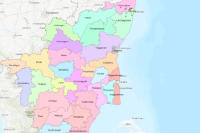

In [14]:
chennaipop = gis.content.search("Solid Waste Management", item_type="feature service", outside_org=True)[0]
chennaipop

In [15]:
map.add_layer(chennaipop)

To get a sense of how much it rained and where, let's use rainfall data for December 2nd 2015, obtained from the Regional Meteorological Center in Chennai. The data is in chennai-rainfall.csv file, that we load into a Pandas data frame, and list its contents:

In [16]:
import pandas as pd
df = pd.read_csv('data/chennai-rainfall.csv')
df.head()

,WEATHER STATION,LOCATION,RAINFALL
0,TAMBARAM,"TAMBARAM, TAMIL NADU",49
1,CHEMBARABAKKAM,"CHEMBARABAKKAM, TAMIL NADU",47
2,MARAKKANAM,"MARAKKANAM, TAMIL NADU",42
3,CHENGALPATTU,"CHENGALPATTU, TAMIL NADU",39
4,PONNERI,"PONNERI, TAMIL NADU",39


Tabular data is hard to visualize, so let's bring in a map from our GIS to visualize the data:

In [17]:
map = gis.map("Tamil Nadu", zoomlevel=7)
map

MapView(layout=Layout(height='400px', width='100%'), zoom=7.0)

We can import any pandas data frame, with an address field, as a layer in our GIS. We then add this layer to our map to see the locations of the weather stations from which the rainfall data was collected:

In [10]:
# Create an arcgis.features.FeatureCollection object by importing the pandas dataframe with an address field
rainfall = gis.content.import_data(df, {"Address" : "LOCATION"})

Generate Features error: Server tool execution failed : ERROR 001508: Request to geocode service failed (made as part of generate or publish). Failed to execute (Generate Features for Portal). Failed. Failed to execute (Generate Features for Portal). Failed.


RuntimeError: Generate Features error: Server tool execution failed : ERROR 001508: Request to geocode service failed (made as part of generate or publish). Failed to execute (Generate Features for Portal). Failed. Failed to execute (Generate Features for Portal). Failed.
(Error Code: 0)